<h1> DataFrame analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("data_copy/orchids.csv")
genus = pd.read_csv("data/genus.csv")

In [6]:
data

,UID,Specie,SubSpecie,Variant,Distribution,href,Genus,Genus_Info,Value
0,39213,Apostasia elliptica,NaN,NaN,"[['peninsular Malaysia', 'Sumatra', 'Borneo', ...",[],Apostasia,"0 Distribution: Tropical Asia, Malesia, Aus...",1065
1,39214,Apostasia fogangica,NaN,NaN,"[['peninsular Malaysia', 'Sumatra', 'Borneo', ...",[],Apostasia,"0 Distribution: Tropical Asia, Malesia, Aus...",1065
2,39215,Apostasia latifolia,NaN,NaN,"[['peninsular Malaysia', 'Sumatra', 'Borneo', ...",['https://www.worldplants.de/fileadmin/Modules...,Apostasia,"0 Distribution: Tropical Asia, Malesia, Aus...",1065
3,39216,Apostasia nuda,NaN,NaN,"[['peninsular Malaysia', 'Sumatra', 'Borneo', ...",[],Apostasia,"0 Distribution: Tropical Asia, Malesia, Aus...",1065
4,39217,Apostasia odorata,NaN,NaN,"[['peninsular Malaysia', 'Sumatra', 'Borneo', ...",[],Apostasia,"0 Distribution: Tropical Asia, Malesia, Aus...",1065
...,...,...,...,...,...,...,...,...,...
34828,73295,Madisonia carrisii,NaN,NaN,"[['Brazil', '84 BRA'], ['Brazil', '84 BRA'], [...",[],Madisonia,"748 Distribution: South America, mostly Bra...",1813
34829,73296,Madisonia gomesii-ferreirae,NaN,NaN,"[['Brazil', '84 BRA'], ['Brazil', '84 BRA'], [...",[],Madisonia,"748 Distribution: South America, mostly Bra...",1813
34830,73297,Madisonia ianthina,NaN,NaN,"[['Brazil', '84 BRA'], ['Brazil', '84 BRA'], [...",[],Madisonia,"748 Distribution: South America, mostly Bra...",1813
34831,73298,Madisonia kerrii,NaN,NaN,"[['Brazil', '84 BRA'], ['Brazil', '84 BRA'], [...",[],Madisonia,"748 Distribution: South America, mostly Bra...",1813


In [3]:
orchids = data.fillna("-")

In [4]:
filtered_data = orchids[orchids["Variant"]=="-"][orchids["SubSpecie"]=="-"][["Specie","Genus","Distribution"]]

In [5]:
filtered_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     8,     9,    10,
               11,
            ...
            11791, 11792, 11793, 11794, 11795, 11796, 11797, 11798, 11799,
            11800],
           dtype='int64', length=11014)

In [6]:
genus.head(2)

,Genus,Value,Distribution
0,Apostasia,1065,"Distribution: Tropical Asia, Malesia, Australia"
1,Neuwiedia,1066,"Distribution: S-China, Indochina, Malesia from..."


In [7]:
data.replace(np.nan, "", inplace=True)

In [8]:
data[data["Genus"]== "Epistephium"].count()


UID             28
Specie          28
SubSpecie       28
Variant         28
Distribution    28
href            28
Genus           28
Genus_Info      28
Value           28
dtype: int64

In [9]:
data.to_csv("data/orchids.csv", index=False, header=True)

In [10]:
!ls images| wc -l

    7693


In [11]:
count_images = 0
for ind in data.index-1:
    tmp = data.iloc[ind]["href"][2:-2]
    if len(tmp) != 0:
        rs = tmp.replace("', '", " ").split()
        for i in rs:
            count_images += 1
print(count_images)

2999


In [34]:
count_images = 0
count_images_genus = []
for j in genus.index-1:
    i = genus.iloc[j]["Genus"]
    v = genus.iloc[j]["Value"]
    tmp = data[data["Genus"] == i]["href"]
    for l in tmp:
        l = l[2:-2]
        if len(l) != 0:
            rs = l.replace("', '", " ").split()
            for k in rs:
                count_images += 1
    count_images_genus.append([i,v,count_images])
    count_images = 0

In [35]:
images = pd.DataFrame(count_images_genus, columns=["Genus","Value,","Image_Count"])
images.sort_values(by=['Image_Count'], ascending=False, inplace = True)



In [36]:
img = images[["Genus","Image_Count"]].sort_values(by="Image_Count", ascending=True)

In [37]:
img = img.set_index('Genus')
img

,Image_Count
Genus,
Cirrhaea,0
Hammarbya,0
Crossoglossa,0
Alatiliparis,0
Orestias,0
...,...
Dactylorhiza,128
Disa,165
Epipactis,206


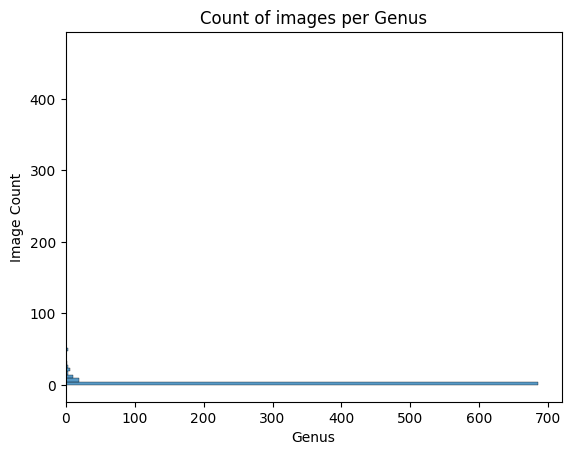

In [48]:
hist = sns.histplot(y = img.Image_Count, bins =100);
hist.set(xlabel ="Genus", ylabel = "Image Count", title ='Count of images per Genus');

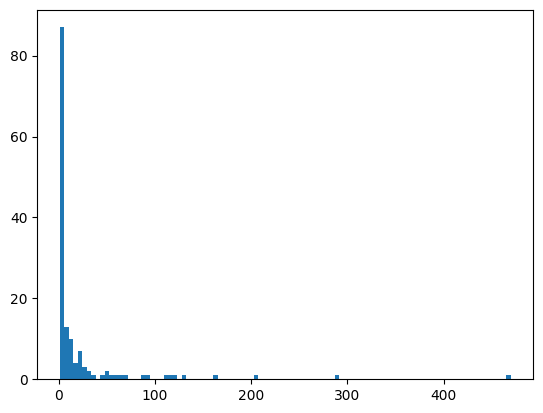

In [40]:
plt.hist(img[img.Image_Count != 0], bins = 100, cumulative=False);

In [17]:
img[img.Image_Count == 0].count()

Image_Count    605
dtype: int64

In [18]:
count_images_genus = []
count_images = 0
for i in genus.index-1:
    j = genus.iloc[i]["Genus"]
    tmp = data[data["Genus"] == j]["href"]
    for k in tmp:
        tmp2 = k
        tmp2 = tmp2[2:-2]
        if len(tmp2) != 0:
            rs = tmp2.replace("', '", " ").split()
            for l in rs:
                count_images += 1
    count_images_genus.append([j,count_images])
    count_images = 0

In [19]:
count_images_genus = pd.DataFrame(count_images_genus, columns =["Genus","Image_count"])
count_images_genus = count_images_genus.sort_values(by="Image_count",ascending=True)

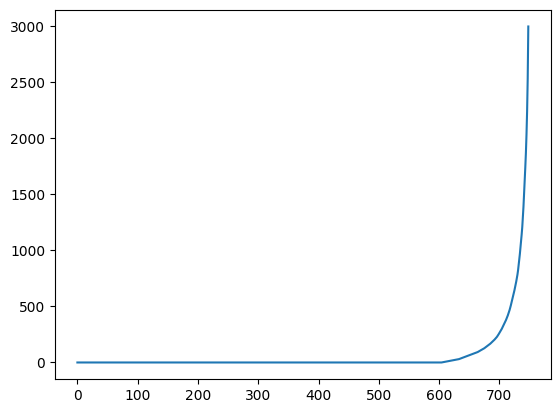

In [20]:
import matplotlib.pyplot as plt
count_images_genus["CumSum"] =count_images_genus["Image_count"].cumsum()
count_images_genus
x = [i for i in range(len(count_images_genus))]
plt.plot(x, count_images_genus["CumSum"]);

In [61]:
data = data.drop(data.index[[0]])
poblacio = data.groupby(["Genus"])["Specie"].count()

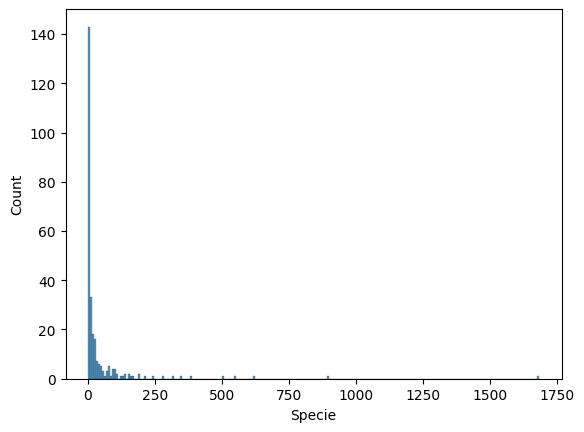

In [22]:

import seaborn as sns

sns.histplot(poblacio);

In [67]:
poblacio = pd.DataFrame(poblacio)
poblacio = poblacio.sort_values(by="Specie", ascending=False)

In [68]:
poblacio

,Specie
Genus,
Dendrobium,1685
Habenaria,898
Coelogyne,617
Ophrys,552
Bulbophyllum,509
...,...
Hsenhsua,1
Kionophyton,1
Lepidogyne,1


In [75]:
poblacio.cumsum()

,Specie
Genus,
Dendrobium,1685
Habenaria,2583
Coelogyne,3200
Ophrys,3752
Bulbophyllum,4261
...,...
Hsenhsua,11793
Kionophyton,11794
Lepidogyne,11795


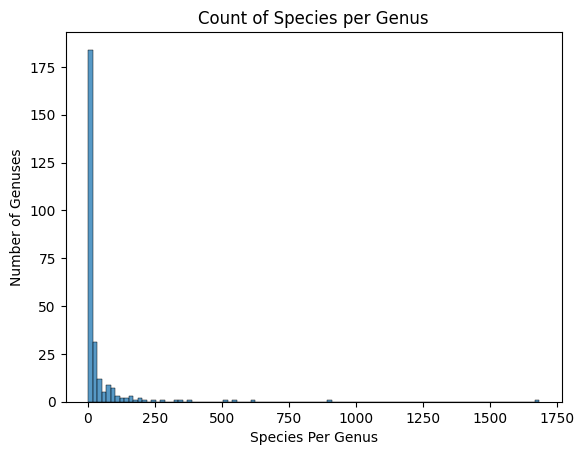

In [74]:
hist_pob = sns.histplot(x = poblacio.Specie, bins =100);
hist_pob.set(xlabel ="Species Per Genus", ylabel = "Number of Genuses", title ='Count of Species per Genus');

In [ ]:
#plt.style.use('_mpl-gallery')

In [ ]:
plt.stem(pob.Genus, pob.Specie);

In [ ]:
poblacio.reset_index(inplace=True)


In [ ]:
df = pd.merge(genus,poblacio, how = "inner", on=["Value","Genus"])
df

In [ ]:
df.sort_values("Specie",ascending=False, inplace=True)
df